# Use of numpy and linear algebra in Python
### Operations, usage and effeciency

NumPy is a powerful Python library widely used for numerical computations, especially in the field of linear algebra. It provides efficient tools for working with vectors, matrices, and higher-dimensional arrays. With NumPy, you can easily perform operations such as matrix multiplication, transposition, inversion, and eigenvalue decomposition. These capabilities are essential for applications in data science, engineering, physics, and machine learning. By leveraging NumPy's optimized routines, you can handle large-scale linear algebra problems with both speed and accuracy.

## Table of Contents

1. **Introduction to NumPy**
    - What is NumPy?
    - Installing and Importing NumPy

2. **NumPy Arrays**
    - Creating Arrays
    - Array Indexing and Slicing
    - Array Types

3. **Linear Algebra with NumPy**
    - Vectors and Matrices
    - Matrix Multiplication
    - Transpose and Reshape
    - Example

5. **Efficiency and Matrix Inversion**
    - Performance Considerations
    - `np.linalg.solve` vs `np.linalg.inv`

## 1. Introduction to NumPy
See the NumPy documentation for further information: https://numpy.org/

NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

**Installing NumPy:**
You can install NumPy using pip:
```
pip install numpy
```

**Importing NumPy:**
To use NumPy in your Python code, import it as follows:
```python
import numpy as np
```

Test the cell below to see if numpy is working. (If you have launched this notebook from MyBinder the package should already be installed and you do not need to pip install.)

In [2]:
import numpy as np
print("Numpy version: ", np.__version__)

Numpy version:  2.3.1


## 2. NumPy Arrays

NumPy arrays are the core data structure of the NumPy library. They are similar to Python lists but provide much greater efficiency and functionality for numerical operations. Arrays can be one-dimensional (vectors), two-dimensional (matrices), or have even higher dimensions. NumPy arrays support element-wise operations, broadcasting, and a wide range of mathematical functions, making them ideal for scientific and engineering computations.

**Creating a 2D NumPy array (matrix):**
```python
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
```
**Indexing a 2D array (accessing a single element):**
```python
print(A[0, 1])  # Output: 2 (first row, second column)
```
**Slicing a 2D array (accessing rows and columns):**
```python
print(A[0, :])   # Output: [1 2 3] (first row, all columns)
print(A[:, 1])   # Output: [2 5 8] (all rows, second column)
print(A[1:3, 0:2])  # Output: [[4 5], [7 8]] (rows 1-2, columns 0-1)
```
These operations allow you to efficiently create, access, and manipulate matrix data in NumPy arrays, which is fundamental for linear algebra operations.

Try to slice the array below to give the second column without the last number of the column. 

In [5]:
# Create a 2D array
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("2D Array:\n", array_2d)

slice_2d = array_2d[0, :]  # Slice the array correctly
print("Sliced 2D Array:\n", slice_2d)


2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sliced 2D Array:
 [1 2 3]


### 2.1 Array Types

NumPy arrays have a specific data type (dtype) that determines the type of elements they can store. Usually when defining an array NumPy autodetects the type and defines it for you, but in some cases it is important to define which type an array is.

**Common NumPy Data Types:**
- `int32`, `int64`: Integer types
- `float32`, `float64`: Floating-point types
- `complex64`, `complex128`: Complex number types
- `bool`: Boolean type

**Creating arrays with specific data types:**
```python
# Integer array
int_array = np.array([1, 2, 3], dtype=np.int32)

# Float array
float_array = np.array([1.0, 2.5, 3.7], dtype=np.float64)

# Complex array
complex_array = np.array([1+2j, 3+4j, 5+6j], dtype=np.complex128)
```

**Complex Numbers in NumPy:**
Complex numbers are particularly important in our field, and when creating arrays containing complex numbers it is important to define the array as dtype=np.complex, and be attentive as type errors in arrays are a common mistake. If you are making an array with both real and complex values, defining it as complex is important to be able to add the complex numbers.

```python
# Creating complex arrays
z = np.array([1+2j, 3-1j, 2+3j], dtype = np.complex)
print("Complex array:", z)
print("Real parts:", z.real)
print("Imaginary parts:", z.imag)
print("Magnitudes:", np.abs(z))
print("Phases:", np.angle(z))
```

You can check and convert data types using `dtype` attribute and `astype()` method:
```python
arr = np.array([1, 2, 3])
print("Original dtype:", arr.dtype)
complex_arr = arr.astype(np.complex128)
print("Converted dtype:", complex_arr.dtype)
```

In [15]:
# Exercise: Working with Complex Data Types
# The code below has an issue - fix it to make it work properly!

# Create arrays with different data types
real_numbers = np.array([1.5, 2.3, 3.7])
complex_numbers = np.array([1+2j, 3+4j, 5+6j])

print("Real numbers array:", real_numbers)
print("Real numbers dtype:", real_numbers.dtype)
print()

print("Complex numbers array:", complex_numbers)
print("Complex numbers dtype:", complex_numbers.dtype)
print()

#? Can you fix the code below?

# Create a complex array with mixed real numbers, and adding complex numbers later.
mixed_complex = np.array([1.0, 2.0, 3.0])
print("Mixed complex array:", mixed_complex)
print("Mixed complex dtype:", mixed_complex.dtype)
mixed_complex[1] = 2 + 3j  # Adding a complex number to the array
# !!! ERROR: As the array has dtype float, adding a complex number will not work.
mixed_complex = mixed_complex + 1 + 2j  # Adding complex numbers is okay as you change all elements to complex and the dtype will change to complex automatically
print("Mixed complex array after adding complex numbers:", mixed_complex)
print("Mixed complex dtype after adding complex numbers:", mixed_complex.dtype)

# Filling a 2D array with zeros and adding a complex number
zer = np.zeros((2, 3))  # Create a 2D array of zeros
zer[1, 1] = 1 + 1j
# !!! ERROR: As the array has dtype float, adding a complex number will not work.


Real numbers array: [1.5 2.3 3.7]
Real numbers dtype: float64

Complex numbers array: [1.+2.j 3.+4.j 5.+6.j]
Complex numbers dtype: complex128

Mixed complex array: [1. 2. 3.]
Mixed complex dtype: float64


TypeError: float() argument must be a string or a real number, not 'complex'

## 3. Linear Algebra with NumPy Arrays

### 3.1 Basic Operations

**Matrix Operations:**
```python
A = np.array([[1, 2, 3], [4, 5, 6]])
A_T = A.T  # Transpose

Z = np.array([[1, 2], [3, 4]])
Y = np.array([[5, 6], [7, 8]])
result = Z @ Y  # Matrix multiplication

V = np.array([1.0+0j, 0.95-0.1j])
I = Z @ V  # Matrix-vector multiplication
```

### 3.2 System Solving

**Matrix Inversion and Linear Systems:**
```python
Z = np.array([[4, 2], [3, 1]], dtype=np.float64)
Y = np.linalg.inv(Z)  # Matrix inversion

# Solving Zx = V (preferred over inversion)
I = np.linalg.solve(Z, V)
```

### 3.3 Advanced Operations

**Determinants, Eigenvalues, and Complex Operations:**
```python
det_Z = np.linalg.det(Z)  # Determinant
eigenvalues, eigenvectors = np.linalg.eig(Z)  # Eigendecomposition

# Polar to rectangular conversion
V_mag = np.array([1.0, 0.95, 1.02])
V_angle = np.array([0, -5, 2]) * np.pi/180
V = V_mag * np.exp(1j * V_angle)
```

In [22]:
# Power System Analysis Example
# A simple 3-bus power system with impedance matrix and load flow calculation

print("=== 3-Bus Power System Analysis ===")
print()

# Step 1: Define system impedance matrix Z (ohms)
Z = np.array([[0.10+0.20j, 0.05+0.10j, 0.02+0.05j],
              [0.05+0.10j, 0.08+0.15j, 0.03+0.08j],
              [0.02+0.05j, 0.03+0.08j, 0.12+0.25j]], dtype=np.complex128)

print("Impedance Matrix Z:")
print(Z)
print()

# Step 2: Calculate admittance matrix Y = Z^(-1)
Y = np.linalg.inv(Z)
print("Admittance Matrix Y = Z^(-1):")
print(Y)
print()

# Step 3: Define bus voltages (per unit)
V_mag = np.array([1.05, 1.00, 0.98])  # Voltage magnitudes
V_angle = np.array([0, -2, -5]) * np.pi/180  # Voltage angles in radians
V = V_mag * np.exp(1j * V_angle)  # Complex voltages

print("Bus Voltages:")
for i in range(3):
    print(f"V{i+1} = {V[i]:.4f} = {V_mag[i]:.3f}∠{V_angle[i]*180/np.pi:.1f}°")
print()

# Step 4: Calculate bus currents I = Y @ V
I = Y @ V

print("Bus Currents:")
for i in range(3):
    magnitude = np.abs(I[i])
    angleRAD = np.angle(I[i])
    angleDEG = np.angle(I[i], deg=True)
    print(f"I{i+1} = {I[i]:.4f} = {magnitude:.3f}∠{angleDEG:.1f}°")
print()

# Step 5: Calculate complex power S = V * conj(I)
S = V * np.conj(I)
P = np.real(S)  # Real power or S.real
Q = np.imag(S)  # Reactive power or S.imag

print("Bus Powers:")
for i in range(3):
    print(f"Bus {i+1}: P = {P[i]:.3f} MW, Q = {Q[i]:.3f} MVAR")
print()

# Step 7: Eigenvalue analysis for stability
eigenvalues = np.linalg.eig(Y)[0]
print(f"Y-matrix eigenvalues: {eigenvalues}")
print(f"All eigenvalues have positive real parts: {np.all(np.real(eigenvalues) > 0)}")
print()


=== 3-Bus Power System Analysis ===

Impedance Matrix Z:
[[0.1 +0.2j  0.05+0.1j  0.02+0.05j]
 [0.05+0.1j  0.08+0.15j 0.03+0.08j]
 [0.02+0.05j 0.03+0.08j 0.12+0.25j]]

Admittance Matrix Y = Z^(-1):
[[ 3.05721091-5.91762352j -2.16245795+3.83685877j  0.09910722-0.01161672j]
 [-2.16245795+3.83685877j  5.01993872-8.45846569j -1.30267685+1.74344839j]
 [ 0.09910722-0.01161672j -1.30267685+1.74344839j  1.98850586-3.74948997j]]

Bus Voltages:
V1 = 1.0500+0.0000j = 1.050∠0.0°
V2 = 0.9994-0.0349j = 1.000∠-2.0°
V3 = 0.9763-0.0854j = 0.980∠-5.0°

Bus Currents:
I1 = 1.2786-2.3233j = 2.652∠-61.2°
I2 = 1.3283-2.7865j = 3.087∠-64.5°
I3 = 0.4841-2.0547j = 2.111∠-76.7°

Bus Powers:
Bus 1: P = 1.343 MW, Q = 2.439 MVAR
Bus 2: P = 1.425 MW, Q = 2.738 MVAR
Bus 3: P = 0.648 MW, Q = 1.965 MVAR

Y-matrix eigenvalues: [6.67557612-11.48054311j 2.30815161 -4.33712871j 1.08192775 -2.30790735j]
All eigenvalues have positive real parts: True



## 4. Computational Efficiency 

In power system analysis, computational efficiency becomes critical when dealing with large networks. Understanding these principles can significantly reduce computation time.

### 4.1 Matrix Inversion vs Direct Solving

For solving linear systems Ax = b, two approaches are commonly used:

```python
# Method 1: Matrix inversion
x = np.linalg.inv(A) @ b

# Method 2: Direct solving (preferred)
x = np.linalg.solve(A, b)
```

The direct solving method is preferred for several reasons:
- **Computational complexity**: O(n³) for both, but solve() has smaller constants
- **Numerical stability**: Direct methods avoid accumulation of rounding errors
- **Memory requirements**: No need to store the full inverse matrix

### 4.2 Dense vs Sparse Matrix Structures

Power system matrices exhibit different sparsity patterns depending on their physical meaning:

**Example of a dense Impedance Matrix (Z)**
```python
Z = np.array([[0.10+0.20j, 0.05+0.10j, 0.02+0.05j],
              [0.05+0.10j, 0.08+0.15j, 0.03+0.08j], 
              [0.02+0.05j, 0.03+0.08j, 0.12+0.25j]])
# Most elements are non-zero
```

**Example of a sparse Admittance Matrix (Y)**
```python

Y = np.array([[5+2j, -1-0.5j, 0,        0      ],
              [-1-0.5j, 5+2j, -1-0.5j,  0      ],
              [0,      -1-0.5j, 5+2j,  -1-0.5j],
              [0,       0,     -1-0.5j,  5+2j  ]])
# Many zero elements (sparse structure)
```

For large networks (1000+ buses), exploiting sparsity in matrices like the Y bus can significantly improve computational efficiency. 

=== Computational Efficiency Demo with Visualization ===

Testing different matrix sizes...
Testing 50x50 matrix... Speedup: 3.3x
Testing 100x100 matrix... Speedup: 2.7x
Testing 200x200 matrix... Speedup: 3.0x
Testing 300x300 matrix... Speedup: 2.6x
Testing 400x400 matrix... Speedup: 3.2x
Testing 500x500 matrix... Speedup: 2.5x

=== Visualization ===
GITHUB COPILOT SUGGESTION AND IMPLEMENTATION!


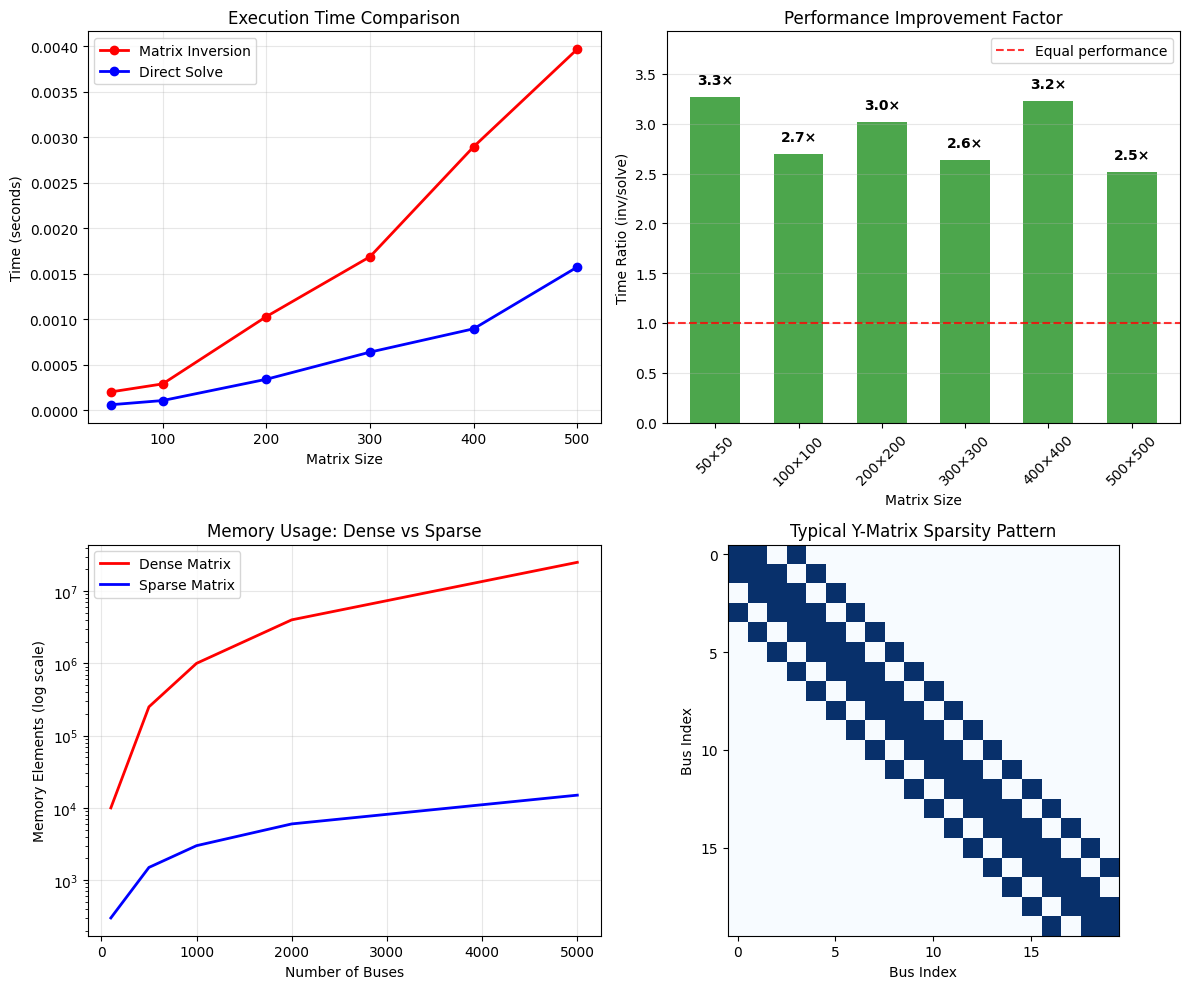


Summary for largest system (500x500):
Matrix inversion: 0.0040 seconds
Direct solve:     0.0016 seconds
Speedup factor:   2.5x
Average speedup:  2.9x

Sparsity example (20x20 system):
Total elements: 400
Non-zero elements: 92
Sparsity: 77.0% zeros


In [13]:
# Efficiency Comparison with Visualization
import time
import numpy as np
import matplotlib.pyplot as plt

print("=== Computational Efficiency Demo with Visualization ===")
print()

# Test different matrix sizes to show scaling
sizes = [50, 100, 200, 300, 400, 500]
inv_times = []
solve_times = []
speedups = []

np.random.seed(42)  # For reproducible results

print("Testing different matrix sizes...")
for n in sizes:
    print(f"Testing {n}x{n} matrix...", end=" ")
    
    # Create symmetric positive definite matrix
    A = np.random.randn(n, n)
    A = A @ A.T
    b = np.random.randn(n)
    
    # Time matrix inversion method
    start = time.time()
    x1 = np.linalg.inv(A) @ b
    inv_time = time.time() - start
    inv_times.append(inv_time)
    
    # Time solve method
    start = time.time()
    x2 = np.linalg.solve(A, b)
    solve_time = time.time() - start
    solve_times.append(solve_time)
    
    speedup = inv_time / solve_time
    speedups.append(speedup)
    
    print(f"Speedup: {speedup:.1f}x")

print("\n=== Visualization ===")
print("GITHUB COPILOT SUGGESTION AND IMPLEMENTATION!")

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Execution times comparison
ax1.plot(sizes, inv_times, 'ro-', label='Matrix Inversion', linewidth=2, markersize=6)
ax1.plot(sizes, solve_times, 'bo-', label='Direct Solve', linewidth=2, markersize=6)
ax1.set_xlabel('Matrix Size')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Execution Time Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Time ratio (log scale) - cleaner visualization
time_ratios = np.array(inv_times) / np.array(solve_times)
ax2.bar(range(len(sizes)), time_ratios, color='green', alpha=0.7, width=0.6)
ax2.set_xlabel('Matrix Size')
ax2.set_ylabel('Time Ratio (inv/solve)')
ax2.set_title('Performance Improvement Factor')
ax2.set_xticks(range(len(sizes)))
ax2.set_xticklabels([f'{s}×{s}' for s in sizes], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=1, color='r', linestyle='--', alpha=0.8, label='Equal performance')

# Add value labels on bars
for i, ratio in enumerate(time_ratios):
    ax2.text(i, ratio + 0.1, f'{ratio:.1f}×', ha='center', va='bottom', fontweight='bold')

ax2.legend()
ax2.set_ylim(0, max(time_ratios) * 1.2)

# Plot 3: Sparse vs Dense memory usage
system_sizes = [100, 500, 1000, 2000, 5000]
dense_memory = [n**2 for n in system_sizes]
sparse_memory = [n*3 for n in system_sizes]  # ~3 connections per bus

ax3.semilogy(system_sizes, dense_memory, 'r-', label='Dense Matrix', linewidth=2)
ax3.semilogy(system_sizes, sparse_memory, 'b-', label='Sparse Matrix', linewidth=2)
ax3.set_xlabel('Number of Buses')
ax3.set_ylabel('Memory Elements (log scale)')
ax3.set_title('Memory Usage: Dense vs Sparse')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Matrix sparsity visualization
# Create a sample sparse matrix pattern
size = 20
Y_sparse = np.zeros((size, size))
for i in range(size):
    Y_sparse[i, i] = 1  # Diagonal
    if i > 0:
        Y_sparse[i, i-1] = 1  # Sub-diagonal
        Y_sparse[i-1, i] = 1  # Super-diagonal
    if i < size-3:  # Some additional connections
        Y_sparse[i, i+3] = 1
        Y_sparse[i+3, i] = 1

im = ax4.imshow(Y_sparse, cmap='Blues', aspect='equal')
ax4.set_xlabel('Bus Index')
ax4.set_ylabel('Bus Index')
ax4.set_title('Typical Y-Matrix Sparsity Pattern')
ax4.set_xticks(range(0, size, 5))
ax4.set_yticks(range(0, size, 5))

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nSummary for largest system ({sizes[-1]}x{sizes[-1]}):")
print(f"Matrix inversion: {inv_times[-1]:.4f} seconds")
print(f"Direct solve:     {solve_times[-1]:.4f} seconds")
print(f"Speedup factor:   {speedups[-1]:.1f}x")
print(f"Average speedup:  {np.mean(speedups):.1f}x")

# Sparsity demonstration
print(f"\nSparsity example (20x20 system):")
total_elements = size**2
nonzero_elements = np.count_nonzero(Y_sparse)
sparsity = (1 - nonzero_elements/total_elements) * 100
print(f"Total elements: {total_elements}")
print(f"Non-zero elements: {nonzero_elements}")
print(f"Sparsity: {sparsity:.1f}% zeros")